In [1]:
include("../HFModel.jl")
using .HFModel
using Plots
using LaTeXStrings
theme(:dracula)

In [ ]:
# Assuming you have defined `Parameters` struct and `run_simulation!` function elsewhere

# Define fixed variables
Df = 1.0
Dh = 1.0
v0 = 1.0
λ = 10.0
s0 = 0.5
f0 = 0.1
L = 1000.0
dx = 0.3
T = 120.0
dt = 0.01
thin_by = 100
wave_type=:pulled

# Define parameter ranges for beta and alpha
β_values = -5.0:1.0:5.0  # Example range for β, adjust as needed
α_values = 0:0.05:0.5  # Example range for α, adjust as needed

front_speeds_matrix = zeros(length(α_values), length(β_values))

p = plot() # Initialize plot

for (j,β) in enumerate(β_values)
    front_speeds = zeros(length(α_values))

    for (i,α) in enumerate(α_values)
        # Instantiate Parameters struct with the current set of variables
        par = Parameters(Df, Dh, v0, α, 0.0, λ, s0, f0, β, L, dx, T, dt, thin_by, wave_type)

        # Initialize frequencies and heights arrays
        frequencies = similar(par.xs)
        frequencies .= 0
        frequencies[par.xs .< 0] .= 1  # Assuming par.xs is defined somewhere

        heights = similar(par.xs)
        heights .= 0

        # Run simulation with current parameters
        @time result, record_times = run_simulation!(frequencies, heights, par)

        # Calculate front locations
        front_locations = [sum(result[:, time_index, 1]) * par.dx for time_index in 1:length(record_times)]

        # Linear regression to find the invasion speed
        reg =  record_times .> par.T * 0.8
        X = hcat(record_times[reg], ones(length(record_times[reg])))
        invasion_speed = X \ front_locations[reg]
        
        # Store the calculated speed
        front_speeds[i] = invasion_speed[1]
    end
    front_speeds_matrix[:, j] = front_speeds # Store speeds for this gamma
    scatter!(p, α_values, front_speeds, label="β = $β", xlabel="Alpha (\alpha)", ylabel="Front Speed", linewidth=2)
end

# Further processing of `results` can be done as needed


In [ ]:
plot!(p, α_values, sqrt.(2 * λ * α_values), label=:none)
display(p)

In [ ]:
# Assuming you have defined `Parameters` struct and `run_simulation!` function elsewhere

# Define fixed variables
Df = 1.0
Dh = 1.0
v0 = 1.0
λ = 10.0
s0 = 0.5
f0 = 0.1
L = 2000.0
dx = 0.3
T = 220.0
dt = 0.01
thin_by = 200
wave_type=:pushed

# Define parameter ranges for beta and alpha
β_values = -5.0:1.0:5.0  # Example range for β, adjust as needed
α_values = -0.2:0.01:0.2  # Example range for α, adjust as needed

front_speeds_matrix = zeros(length(α_values), length(β_values))

p = plot() # Initialize plot

for (j,β) in enumerate(β_values)
    front_speeds = zeros(length(α_values))

    for (i,α) in enumerate(α_values)
        # Instantiate Parameters struct with the current set of variables
        par = Parameters(Df, Dh, v0, α, 0.0, λ, s0, f0, β, L, dx, T, dt, thin_by, wave_type)

        # Initialize frequencies and heights arrays
        frequencies = similar(par.xs)
        frequencies .= 0
        frequencies[par.xs .< 0] .= 1  # Assuming par.xs is defined somewhere

        heights = similar(par.xs)
        heights .= 0

        # Run simulation with current parameters
        @time result, record_times = run_simulation!(frequencies, heights, par)

        # Calculate front locations
        front_locations = [sum(result[:, time_index, 1]) * par.dx for time_index in 1:length(record_times)]

        # Linear regression to find the invasion speed
        reg =  record_times .> par.T * 0.9
        X = hcat(record_times[reg], ones(length(record_times[reg])))
        invasion_speed = X \ front_locations[reg]
        
        # Store the calculated speed
        front_speeds[i] = invasion_speed[1]
    end
    front_speeds_matrix[:, j] = front_speeds 
    scatter!(p, α_values, front_speeds, label="β = $β", xlabel="Alpha (α)", ylabel="Front Speed", linewidth=2)
end

# Further processing of `results` can be done as needed


In [ ]:
p = plot()

reg = α_values .> 0
plot!(p, α_values, sign.(α_values).*sqrt.(2 * λ * abs.(α_values)), label=:none)

for (j, β) in enumerate(β_values)
    println(β)
    dummy_variable = 0.82
    u0 = sqrt(Df * s0 / 2) * (1 - 2 * f0)
    u_aniso = (u0 .+ dummy_variable * β / λ * sqrt.(2 * λ * α_values[reg])) ./ (1 - β / λ)

    scatter!(p, α_values, front_speeds_matrix[:,j], label="β = $β", xlabel="Alpha (α)", ylabel="Front Speed", linewidth=2)
    plot!(p, α_values[reg], u_aniso, xlabel="Alpha (α)")
end

display(p)

In [ ]:
# Assuming you have defined `Parameters` struct and `run_simulation!` function elsewhere

# Define fixed variables
Df = 1.0
Dh = 1.0
v0 = 1.0
λ = 10.0
s0 = 0.5
f0 = 0.1
L = 2000.0
dx = 0.3
T = 220.0
dt = 0.01
thin_by = 200
wave_type=:pushed

# Define parameter ranges for beta and alpha
β_values = 10.0  # Example range for β, adjust as needed
α_values = -0.5:0.05:0.5  # Example range for α, adjust as needed

front_speeds_matrix = zeros(length(α_values), length(β_values))

p = plot() # Initialize plot

for (j,β) in enumerate(β_values)
    front_speeds = zeros(length(α_values))

    for (i,α) in enumerate(α_values)
        # Instantiate Parameters struct with the current set of variables
        par = Parameters(Df, Dh, v0, α, 0.0, λ, s0, f0, β, L, dx, T, dt, thin_by, wave_type)

        # Initialize frequencies and heights arrays
        frequencies = similar(par.xs)
        frequencies .= 0
        frequencies[par.xs .< 0] .= 1  # Assuming par.xs is defined somewhere

        heights = similar(par.xs)
        heights .= 0

        # Run simulation with current parameters
        @time result, record_times = run_simulation!(frequencies, heights, par)

        # Calculate front locations
        front_locations = [sum(result[:, time_index, 1]) * par.dx for time_index in 1:length(record_times)]

        # Linear regression to find the invasion speed
        reg =  record_times .> par.T * 0.8
        X = hcat(record_times[reg], ones(length(record_times[reg])))
        invasion_speed = X \ front_locations[reg]
        
        # Store the calculated speed
        front_speeds[i] = invasion_speed[1]
    end
    front_speeds_matrix[:, j] = front_speeds # Store speeds for this gamma
    scatter!(p, α_values, front_speeds, label="β = $β", xlabel="Alpha (\alpha)", ylabel="Front Speed", linewidth=2)
end

# Further processing of `results` can be done as needed


In [ ]:
reg = α_values .> 0
plot!(p, α_values, sign.(α_values).*sqrt.(2 * λ * abs.(α_values)), label=:none)
display(p)

Reversal

0.11111111111111112
  0.238845 seconds (13 allocations: 22.585 MiB)


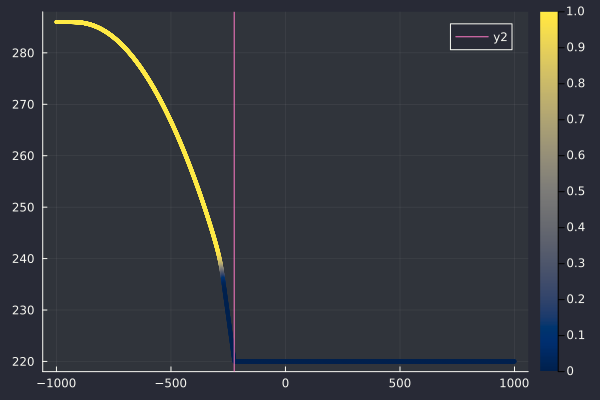

In [3]:
# Define variables explicitly
Df = 1.0      # Diffusion coefficient for frequencies
Dh = 1.0      # Diffusion coefficient for heights
v0 = 1.0      # Baseline speed
α = 0.3      # Parameter alpha
γ = 0.0      # Parameter gamma
λ = 20.0      # Parameter lambda
s0 = 0.5      # Source term for frequencies
f0 = 0.1      # Equilibrium frequency
β = 5.0      # Advection coefficient
L = 2000.0      # Domain length
dx = 0.3      # Spatial step size
T = 220.0       # Total simulation time
dt = 0.01     # Time step size
thin_by = 100  # Thinning parameter

println(Df * dt / dx^2)

# Instantiate Parameters struct with the variables
par = Parameters(Df, Dh, v0, α, γ, λ, s0, f0, β, L, dx, T, dt, thin_by, :pulled)

frequencies = similar(par.xs)
frequencies .= 0;
frequencies[par.xs .< -900] .= 1; 
# frequencies[par.xs .< -50] .= 0

heights = similar(par.xs)
heights .= 0;

@time result, record_times = run_simulation!(frequencies, heights, par);

p = plot(par.xs, result[:,end,2], line_z=result[:,end,1], color=:cividis, label=:none, linewidth=4)
# savefig(p, "Reversal_sector.png")

disc_idx = findlast(result[:,end,2] .> 1.001 * result[end,end,2])
vline!([par.xs[disc_idx]])